

## ========== Média Móvel (3 Meses) ==========

Cenário:
Um gráfico de coluna onde mostra o valor total mes a mes, mas a cada 3 meses eu quero saber a média móvel em uma linha.



<br>
<b>1)</b> Criar uma tabela d_Calendario, onde tenha uma coluna de data continua.

<b>2)</b> Criar uma coluna concatenada mes/ano


###### <i>Todas essas Tabelas e Relacionamentos estão abaixo, com os códigos TMDL </i>

## ================================

In [ ]:
Média_3meses =
VAR Num_meses = 3
VAR ultimadata = MAX(d_Calendario[Date])
VAR periodo = DATESINPERIOD(d_Calendario[Date], ultimadata, -Num_meses, MONTH)

VAR Resultado =
IF([TotalValor] = BLANK(), BLANK(),
CALCULATE(
    AVERAGEX(
        VALUES(d_Calendario[Mes/Ano]),[TotalValor]),periodo))

RETURN Resultado


// Trocar o [TotalValor] por sua medida préviamente criada

**VAR Num_meses** => Essa variável representa quantos meses eu desejo calcular (pode ser mais meses, ou uma forma dinâmica) <br>

 **VAR ultimadata** => Variável que pega a ultima data do d_Calendario

 **VAR periodo** => Ele pega da tabela d_Calendario, a ultima dataultimadata - 3 meses Num_Meses, e no final eu coloco MONTH, para entender que é em meses

 **VAR Resultado** => Primeiro tem um IF, caso não tenha valor no mês selecionado, nem mostre.
No segundo é um calculate, onde ele faz uma média, utilizando uma medida criada
(apenas uma soma)<br>

<i> Obs, essa medida poderia ser anual ou diária, mas nesse exemplo, é a média mensal mesmo.<i>


## TDL do d_Calendario

In [ ]:
createOrReplace

	table d_Calendario
		lineageTag: 6d1b9e33-50b1-45c9-b0a0-3e1721269003

		column Date
			formatString: Short Date
			lineageTag: eae79d7b-cf90-48f0-a2db-c891dca09446
			summarizeBy: none
			isNameInferred
			sourceColumn: [Date]

			variation Variation
				isDefault
				relationship: fe917e01-6a91-4911-a402-20efae5ce9a0
				defaultHierarchy: LocalDateTable_36269855-d83b-4049-9a8a-dbe2d154b963.'Hierarquia de datas'

			annotation SummarizationSetBy = Automatic

		column Mês = ```

				UPPER(LEFT(d_Calendario[Date].[Mês],1)) & LOWER(MID(d_Calendario[Date].[Mês],2,LEN(d_Calendario[Date].[Mês])))

				```
			lineageTag: d5bc5492-eb87-49e6-8b3f-f9faf1999604
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column Ano = d_Calendario[Date].[Ano]
			formatString: 0
			lineageTag: b6d32bce-20e1-4da9-9222-634e8782384c
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column trimestre_num = d_Calendario[Date].[QuarterNo]
			formatString: 0
			lineageTag: adf3e3ad-eaa0-4954-9da0-08781a59e4f9
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column Mes/Ano = ```

				VAR MesAno = FORMAT(d_Calendario[Date], "Mmm/yyyy")
				VAR Resutado =
				UPPER(LEFT(MesAno,1)) & LOWER(MID(MesAno,2,LEN(MesAno)))

				RETURN Resutado
				```
			lineageTag: d0ae289a-70f5-4b05-899f-001421b36e12
			summarizeBy: none
			sortByColumn: 'ordem ano.mes'

			annotation SummarizationSetBy = Automatic

		column 'Mês Numeral' = MONTH(d_Calendario[Date])
			formatString: 0
			lineageTag: 0622712c-e34e-4493-9dfc-c5ca8213ae8c
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column Trimestre = CONCATENATE(QUARTER(d_Calendario[Date]),"Tri")
			lineageTag: 5fcc12ca-f95b-4b43-b3fe-7b4b9e501596
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column 'ordem ano.mes' = d_Calendario[Ano] & FORMAT(d_Calendario[Mês Numeral], "00")
			dataType: int64
			formatString: 0
			lineageTag: 635c8f2d-cdb6-4061-a41b-686b0f451468
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		partition d_Calendario = calculated
			mode: import
			source = CALENDARAUTO()

		annotation PBI_Id = e2492c64a8a743b284c50518b27c2b39



Imagem referente ao código anterior

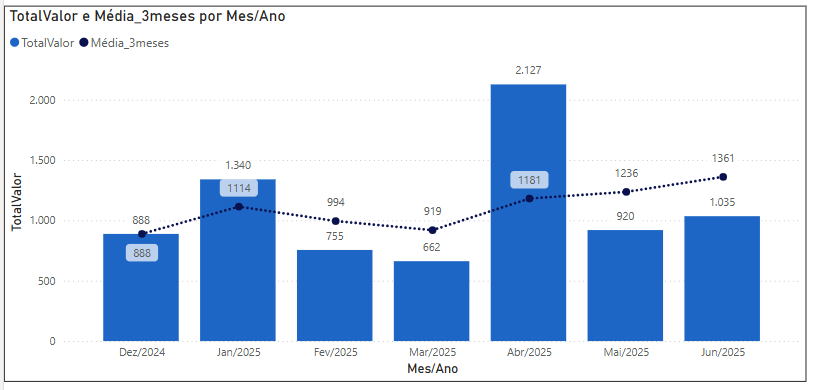

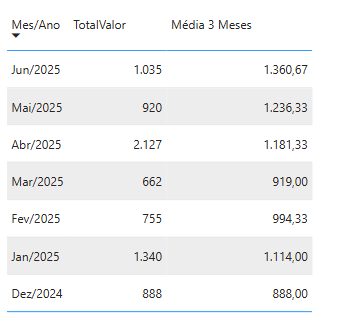